In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from test.common.basic_graph_creation_functions import create_fano_graph, setup_test_graph_elements, create_multitree, create_simple_tree

In [3]:
taxon, simple_tree_graph = create_simple_tree()
fragment = setup_test_graph_elements(taxon, simple_tree_graph)

In [4]:
fragment.D

array([[[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]])

In [59]:
d_out = np.sum(fragment.V.T, axis=2)
print(d_out)

[[1. 0. 0.]
 [1. 0. 0.]]


In [60]:
d_in = np.sum(fragment.V.T, axis=1)
print(d_in)

[[0. 1. 0.]
 [0. 0. 1.]]


In [61]:
D_in = np.apply_along_axis(np.diag, 1, d_in)
print(D_in)

[[[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]]]


In [62]:
D_out = np.apply_along_axis(np.diag, 1, d_out)
print(D_out)

[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [63]:
D = D_out + D_in

In [66]:
np.tensordot(D.T, fragment.I)

array([-2.,  1.,  1.])

Therefore, the total degree values for each node can be calculated from the incidence and the sum of inwards and outwards degree matrices

In [69]:
D_in @ D_out

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Fano graph

In [71]:
taxon, fano_graph = create_fano_graph()
fragment_fano = setup_test_graph_elements(taxon, fano_graph)

In [72]:
d_out = np.sum(fragment_fano.V.T, axis=2)
D_out = np.apply_along_axis(np.diag, 1, d_out)

In [73]:
d_in = np.sum(fragment_fano.V.T, axis=1)
D_in = np.apply_along_axis(np.diag, 1, d_in)

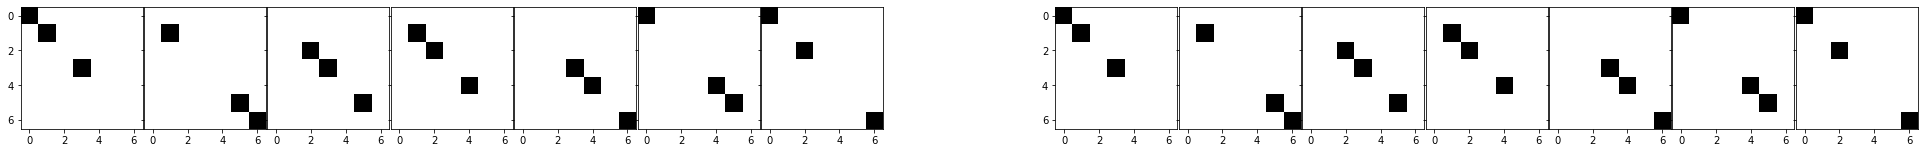

In [74]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 121, nrows_ncols=(1, 7))
for ax, im in zip(grid, D_out):
    ax.imshow(im, cmap=cm.binary)
grid = ImageGrid(fig, 122, nrows_ncols=(1, 7))
for ax, im in zip(grid, D_in):
    ax.imshow(im, cmap=cm.binary)

In [77]:
D = (D_in + D_out)

In [78]:
np.tensordot(D.T, fragment_fano.I)

array([12., 12., 12., 12., 12., 12., 12.])